<div class="alert alert-info">
View notebook in interactive mode for using hyperlinks and correct display of markdown:<br>
<a href='https://nbviewer.org/github/yulianikola/portfolio/blob/master/english/data_analysis_python/linear_regression/boston_eng.ipynb'>boston</a></div>

### Correlation, linear regression

#### Boston metropolitan area real estate data
http://lib.stat.cmu.edu/datasets/boston

#### Task:
Conduct exploratory analysis and train the linear model to predict 'MEDV'.

<p id="0">
<h4>Table of contents</h4>
<ul type="square"><a href="#1">Exploratory data analysis</a><br>
Full dataset
<ul>
    <a href="#2.1"><li>Correlation</li></a>
    <a href="#2.2"><li>Regression</li></a>
</ul>
Split in two groups
<ul>
    <a href="#3.1"><li>Statistics</li></a>
    <a href="#3.2"><li>Group RAD=24</li></a>
    <a href="#3.3"><li>Group RAD<>24</li></a>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Upload the data:

In [2]:
url = "http://lib.stat.cmu.edu/datasets/boston"
raw_data = pd.read_csv(url, sep = "\s+", skiprows = 22, header = None)
array = np.hstack([raw_data.values[::2, :], raw_data.values[1::2, :3]])

In [3]:
raw_descr = pd.read_csv(url, sep = "\s+", skiprows = 7, header = None, nrows = 14 , usecols = [0])
descr = raw_descr[0].values

In [4]:
data = pd.DataFrame(data = array, columns = descr)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Description of variables:
* CRIM     per capita crime rate by town
* ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS    proportion of non-retail business acres per town
* CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX      nitric oxides concentration (parts per 10 million)
* RM       average number of rooms per dwelling
* AGE      proportion of owner-occupied units built prior to 1940
* DIS      weighted distances to five Boston employment centres
* RAD      index of accessibility to radial highways
* TAX      full-value property-tax rate per 10k dollars
* PTRATIO  pupil-teacher ratio by town
* B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT    % lower status of the population
* MEDV     Median value of owner-occupied homes in k dollars

<p id="1">
<h4>Exploratory data analysis</h4>

Data contains 506 rows and 14 variables. Every row represents the district/town/suburb/area of the Boston metropolitan area. There are no nulls. All data types are determined as numeric, so there is no "nulls" indicated as other symbols:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


There is no duplicate rows:

In [6]:
data.duplicated(keep = False)[data.duplicated(keep = False) == True]

Series([], dtype: bool)

Have a look at statistics:
* For variables AGE and B: significant difference between 1st quartile and minimum, mean is lower than median, so probably the distributions are skewed to the left. 
* For variables CRIM, ZN, DIS, LSTAT: significant difference between 3rd quartile and maximum, so probably the distributions are skewed to the right. 
* For variables CRIM, ZN, INDUS, RAD, TAX: median is significantly lower than mean - looks like right-skewed distributions. 
* Half of CRIM values are lower than 0.25, 75% of values are lower than 3.7 and maximum is 89 - quite a wide range.
* Only 7% of districts bound Charles river (CHAS)
* Min and max values are within reasonable limits, so assume that there are no "nulls" indicated as some special number and no errors.

In [7]:
pd.set_option("precision", 3)
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.885,45.025,2.100,4.000,279.000,17.400,375.377,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


According to the description CHAS is a binary variable. <br><br>
RAD is described as an index, which might imply its discrete nature. The values go evenly from 1 to 8, and then jump to 24. The description of this variable in a similar dataset says that the higher the index, the better the accessibility to radial highways. One could think of this index as an ordinal categorical index. But it is not clear what the difference between values of 8 and 24 means. Are areas with a value of 24 significantly better than those with a value of 8? And this difference is greater than the difference between the value of 8 and 7? In the absence of clarifying information, we will consider this indicator to be discrete, not categorical.

In [8]:
data.RAD.value_counts().sort_index()

1.0      20
2.0      24
3.0      38
4.0     110
5.0     115
6.0      26
7.0      17
8.0      24
24.0    132
Name: RAD, dtype: int64

Values of ZN and B raise some questions. The most frequent ZN value is 0, which means that most part of districts do not have lots over 25 000 sq.ft. But apart from zero this variable has many other values.

In [9]:
data.ZN.value_counts().sort_index()

0.0      372
12.5      10
17.5       1
18.0       1
20.0      21
21.0       4
22.0      10
25.0      10
28.0       3
30.0       6
33.0       4
34.0       3
35.0       3
40.0       7
45.0       6
52.5       3
55.0       3
60.0       4
70.0       3
75.0       3
80.0      15
82.5       2
85.0       2
90.0       5
95.0       4
100.0      1
Name: ZN, dtype: int64

Variable B has many unique values. Interestingly, that the most frequent value is maximum (396.9). Based on the variable's formula maximum value corresponds to the minimum proportion of blacks. As the proportion increases up to 0.63, the variable  decreases, and for the proportion from 0.63 and above - increases again.

In [10]:
data.B.value_counts().sort_index()

0.32        1
2.52        1
2.60        1
3.50        1
3.65        1
         ... 
396.28      1
396.30      1
396.33      1
396.42      1
396.90    121
Name: B, Length: 357, dtype: int64

Check how smooth the transition in the values of B: there are values on the whole range from 0 to maximum.

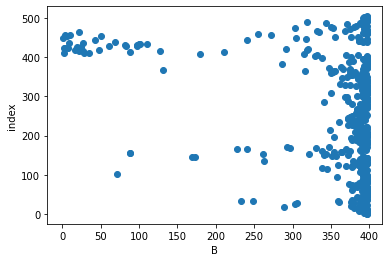

In [11]:
plt.scatter(data.B, data.index);
plt.xlabel('B');
plt.ylabel('index');

According to the boxplots variables CRIM, ZN, RM, DIS, PTRATIO, B, LSTAT, MEDV have outliers.

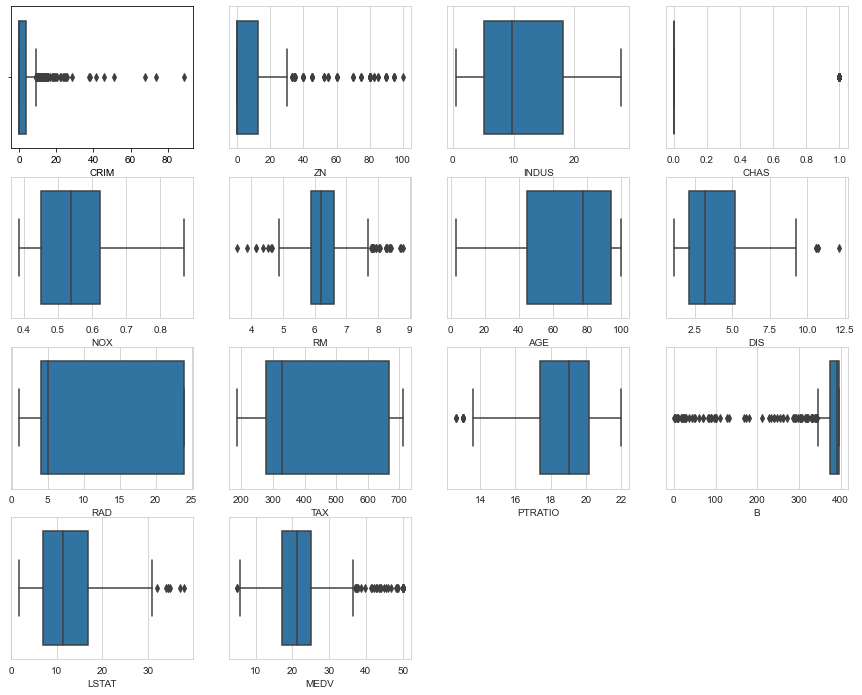

In [12]:
l = data.columns.values
number_of_columns =  4
number_of_rows = - (- len(l) // number_of_columns) # round up
plt.figure(figsize = (15, 12))
for i in range(0, len(l)):
    plt.subplot(number_of_rows, number_of_columns, i + 1)
    sns.set_style('whitegrid')
    sns.boxplot(x = data[l[i]], data = data)

The histograms support our guess about asymmetry of distributions: CRIM, ZN, DIS, LSTAT right-skewed, AGE and B left-skewed. Distributions of RM and MEDV are similar to normal.

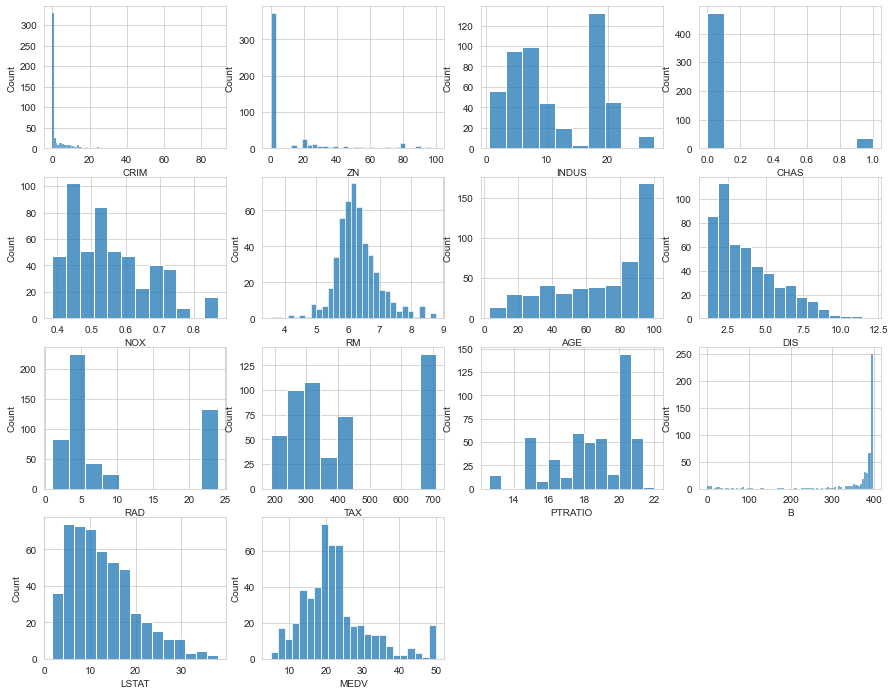

In [13]:
plt.figure(figsize = (15, 12))
for i in range(0, len(l)):
    plt.subplot(number_of_rows, number_of_columns, i + 1)
    sns.histplot(data[l[i]])

The histogram of TAX revealed a "gap" in the range of values, similar to RAD: a jump after 469 to 666 and 711. 

In [14]:
data.TAX.value_counts().sort_index()

187.0      1
188.0      7
193.0      8
198.0      1
216.0      5
        ... 
432.0      9
437.0     15
469.0      1
666.0    132
711.0      5
Name: TAX, Length: 66, dtype: int64

In addition, the frequency of RAD's value of 24 and of TAX's value of 666 are the same. Maybe they are the same group of areas? Looks like this. Perhaps this subgroup should be considered separately in the regression analysis.

In [15]:
pd.crosstab(data[data.RAD == 24].RAD, data[data.TAX == 666].TAX)

TAX,666.0
RAD,
24.0,132


<a href="#0"><h4>Back to the top</h4></a>

<h4>Part 1 (full dataset)</h4>
<p id="2.1">
<h5>Correlation</h5>

Look at the pairwise scatter plots between MEDV and other variables.<br>
- Visually, there is some positive linear relationship between the target and: ZN (only for values greater than 0, with an increase in the proportion of large-area sites, MEDV tends to increase), RM (when the number of rooms increases, MEDV tends to increase), B (for values far from the maximum, when the variable increases (i.e. the proportion of black people decreases), MEDV tends to increase).<br>
- Visually, there is some negative linear relationship with: NOX (when the concentration of nitric oxides increases, MEDV tends to decrease), LSTAT (when the proportion of lower status of the population increases, MEDV tends to decrease, but perhaps the relationship is nonlinear, since the cloud is similar to a hyperbola).<br><br>
The correlations and directions make sense.

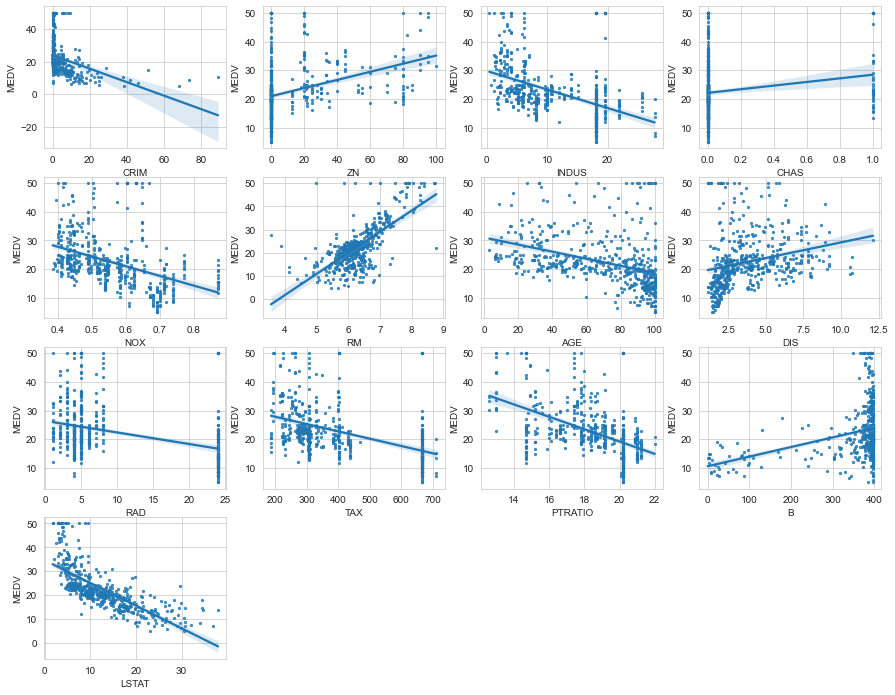

In [16]:
plt.figure(figsize = (15, 12))
for i in range(0, len(l) - 1):
    plt.subplot(number_of_rows, number_of_columns, i + 1)
    sns.regplot(x = data[l[i]], y = data.MEDV, scatter_kws={'s':5})

Let's calculate Pearson and Spearman correlation coefficients between all variables (not just with the target) in order to check for multicollinearity.<br>
All variables are quantitative, so this is the case of using Pearson coefficient (except binary CHAS). But some people recommend using Spearman in case of deviation from normality. Although there is an opinion that the evidence of Spearman's better performance is not obvious. There is also the view that a significant difference between Pearson and Spearman may indicate the presence of significant outliers. Spearman implies a monotonic relationship, not a linear one. A lower Spearman coefficient (compared to Pearson) may indicate a linear relationship.<br>

* Correlation between predictor variables<br>
    * Strong positive linear correlation between RAD and TAX (0.9 Pearson, 0.7 Spearman). Significant problem  in terms of multicollinearity.<br>
    * Quite strong positive (0.7-0.75 Pearson, Spearman quite similar): NOX and AGE, TAX and INDUS, NOX and INDUS; negative: DIS and INDUS, NOX, AGE. Quite a problem in terms of multicollinearity. <br>
    * Spearman twice stronger than Pearson: CRIM and NOX (0.42 vs 0.82), AGE (0.35 vs 0.7), DIS (-0.38 vs -0.74), TAX (0.58 vs 0.73) (CRIM's distribution is highly right-skewed; significant difference between correlation coefficients might be due to asymmetry or nonlinearity of relationship).
* Корреляция с таргетом Correlation with target:<br>
    * Quite strong positive correlations with RM, negative with LSTAT (0.7-0.75 in absolute value Pearson, Spearman quite similar).<br>
    * Moderate-weak negative PTRATIO, TAX, INDUS, NOX (0.4-0.5 Pearson, Spearman quite similar). <br>
    * Moderate negative CRIM (Spearman -0.56, Pearson weak -0.39).<br>

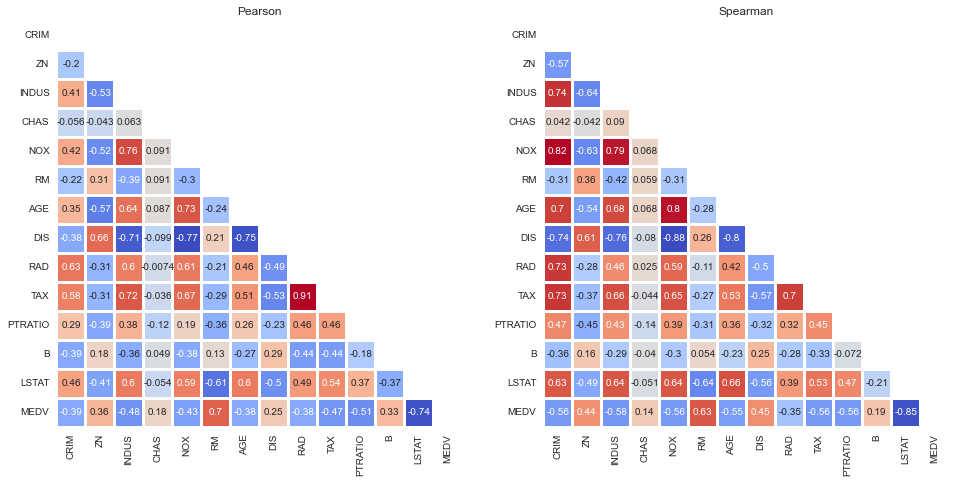

In [17]:
colors = 'coolwarm'
plt.figure(figsize = (16, 10)) 

plt.subplot(1, 2, 1)
matrix_pears = np.triu(data.corr())
sns.heatmap(data.corr(), annot = True, cmap = colors,
            mask = matrix_pears, linewidth = 3,
            square = True, cbar = False).set_title('Pearson');

plt.subplot(1, 2, 2)
matrix_spear = np.triu(data.corr(method = 'spearman'))
sns.heatmap(data.corr(method = 'spearman'), annot = True, cmap = colors,
            mask = matrix_spear, linewidth = 3,
            square = True, cbar = False).set_title('Spearman');

Compare means and medians for CHAS values. Both mean and median are higher for CHAS = 1 than for CHAS = 0.

In [18]:
print('mean MEDV for CHAS = 1 :', data[data.CHAS == 1].MEDV.mean())
print('mean MEDV for CHAS = 0 :', data[data.CHAS == 0].MEDV.mean())

print('median MEDV for CHAS = 1 :', data[data.CHAS == 1].MEDV.median())
print('median MEDV for CHAS = 0 :', data[data.CHAS == 0].MEDV.median())

mean MEDV for CHAS = 1 : 28.44
mean MEDV for CHAS = 0 : 22.093842887473482
median MEDV for CHAS = 1 : 23.3
median MEDV for CHAS = 0 : 20.9


<a href="#0"><h4>Back to the top</h4></a>

<p id="2.2">
<h5>Regression</h5>

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import statsmodels.api

First, choose a model based on the cross-validation.

Write a function that splits data in train/test subsets, performs cross-validation of linear regression model on train subset and returns mean, median and standard deviation of coefficient of determination.

In [20]:
def linreg_cross_val (X, y, size = 0.2):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state = 42, shuffle = True)  
     
    cv = RepeatedKFold(n_splits = 4, n_repeats = 10, random_state = 42)
   
    scores_re = cross_val_score(LinearRegression(), X_train, y_train, scoring = 'r2',  cv = cv)

    return print('average R2: ', round(np.mean(scores_re), 4),
                ' median R2: ', round(np.median(scores_re), 4),
                ' sd R2: ', round(scores_re.std(), 4))

<u>Base model (all predictors, including multicollinear)</u> <br> 
Coef. of determination 0.71, model with 13 predictors.

In [21]:
X = data[data.columns[:-1]]
y = data.MEDV
linreg_cross_val(X,y)

average R2:  0.7174  median R2:  0.7209  sd R2:  0.0527


<u>Predictors with correlation with target higher than 0.4 + CHAS + CRIM</u> <br>
(of multicollinear TAX-RAD only TAX is left, but there are also NOX-INDUS, TAX-INDUS and potentially CRIM-NOX, AGE, DIS, TAX).<br>
The coefficient of determination decreased by 0.04.

In [22]:
cols = []
for col in data.columns[:-1]:
    if abs(data[[col,'MEDV']].corr().loc[col,'MEDV']) >= 0.4:
        cols.append(col)
print(cols + ['CHAS','CRIM'])
X = data[cols + ['CHAS','CRIM']]
linreg_cross_val(X, y)

['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'CHAS', 'CRIM']
average R2:  0.6755  median R2:  0.6787  sd R2:  0.0682


<u>Predictors with correlation with target higher than 0.4 + CRIM </u> <br>
Exclusion of CHAS almost has no impact on coef. of determination value.

In [23]:
print(cols + ['CRIM'])
X = data[cols + ['CRIM']]
linreg_cross_val(X, y)

['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'CRIM']
average R2:  0.6719  median R2:  0.674  sd R2:  0.0693


<u>Predictors with correlation with target higher than 0.4</u> <br>
Exclusion of both CHAS and CRIM almost has no impact on coef. of determination value.

In [24]:
print(cols)
X = data[cols]
linreg_cross_val(X, y)

['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
average R2:  0.6691  median R2:  0.6717  sd R2:  0.0686


<u>Predictors with correlation with target higher than 0.4 + only one of multicollinear INDUS/NOX/TAX.</u> <br>
Leaving in the model only one of multicollinear INDUS/NOX/TAX does not change the coef. of determination value.

In [25]:
print('incl. NOX,')
linreg_cross_val(data[['NOX', 'RM', 'PTRATIO', 'LSTAT']], y)
print('incl. INDUS,')
linreg_cross_val(data[['INDUS', 'RM', 'PTRATIO', 'LSTAT']], y)
print('incl. TAX,')
linreg_cross_val(data[['TAX', 'RM', 'PTRATIO', 'LSTAT']], y)

incl. NOX,
average R2:  0.6694  median R2:  0.6685  sd R2:  0.0645
incl. INDUS,
average R2:  0.6689  median R2:  0.6676  sd R2:  0.0628
incl. TAX,
average R2:  0.6695  median R2:  0.6705  sd R2:  0.068


<u>Predictors with correlation with target higher than 0.4 and without multicollinear.</u> <br>
Exclusion of INDUS/NOX/TAX does not change the coef. of determination value.

In [26]:
X = data[['RM', 'PTRATIO', 'LSTAT']]
y = data.MEDV
linreg_cross_val(X, y)

average R2:  0.6731  median R2:  0.6682  sd R2:  0.0621


Choose the model with predictors 'RM', 'LSTAT', 'PTRATIO', as the coef. of determination is 0.67, just 0.05 lower than in the base model, but 9 predictors fewer.

Train the chosen model on the whole train subset and test on the test subset. Coef. of determination a bit lower (0.63). 
Overall, based on the cross-validation and the result of the test one may expect the coefficient of determination of about 0.6-0.65 in such a model.

In [27]:
X = data[['RM', 'PTRATIO', 'LSTAT']]
y = data.MEDV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)
    
linreg = LinearRegression()
linreg.fit(X_train, y_train)    

print("coef. of determination: ", round(linreg.score(X_test, y_test), 4))
print('coefficients ', list(zip(list(X.columns), linreg.coef_)) + [('intercept', linreg.intercept_)])

coef. of determination:  0.6303
coefficients  [('RM', 4.933118359418637), ('PTRATIO', -0.8670947546233052), ('LSTAT', -0.5671258827383847), ('intercept', 14.58809926157106)]


Check the assumption of regression linearity. Look at residuals distribution. Overall it looks like a normal distribution, but skewed to the right.

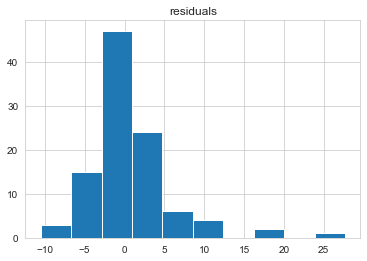

In [28]:
y_pred = linreg.predict(X_test)
plt.hist(y_test - y_pred);
plt.title('residuals');

Create a QQ-plot: mostly dots are close to the line, but at the right-hand end deviate significantly. Probably, there is deviation of residuals from the normal distribution.

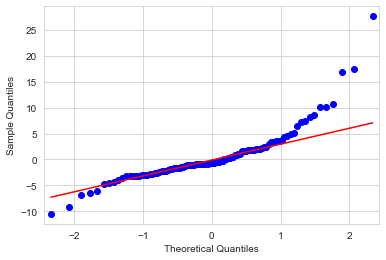

In [29]:
import warnings
warnings.filterwarnings('ignore')
statsmodels.graphics.gofplots.qqplot(y_test - y_pred, line = 'q');

Let's look at the relationship between the predicted values and the residuals. The graph does not look chaotic. The variation along the x-axis differs: more at the sides and less in the middle, looks like parabola. Thus, independence and homoscedasticity are not observed. The cloud resembles a parabola. Perhaps the reason is not recognized nonlinear relationship, e.g. with the LSTAT factor, which was suspicious. One could try some data transformation of the LSTAT factor that makes its relationship with the target more linear.

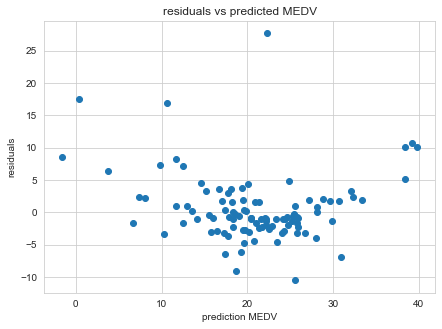

In [30]:
plt.figure(figsize = (7, 5)) 
plt.scatter(y_pred, y_test - y_pred);
plt.title('residuals vs predicted MEDV');
plt.xlabel('prediction MEDV');
plt.ylabel('residuals');

<a href="#0"><h4>Back to the top</h4></a>

<h4>Part 2 (two groups)</h4><br>
Let's look separately at groups with RAD=24 and TAX=666 and another part of the dataset.
<p id="3.1">
<h5>Statistics</h5>

Group contains 132 rows with RAD=24 and TAX=666. Values of other predictors in this group: ZN = 0, INDUS = 18.1, PTRATIO = 20.2, DIS: 1.1-4 (vs 1.1-12 in the whole dataset), AGE 40-100 (vs 3-100), NOX 0.53-0.77 (vs 0.38-0.77), CRIM 2.4-89 (vs 0.0-89). Min and max of other variables are similar to values in the whole dataset.

In [31]:
data_rad_tax = data[(data.RAD == 24) & (data.TAX == 666)]
data_rad_tax.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,132.000,132.000,132.000,132.000,132.000,132.000,132.000,132.000,132.000,132.000,132.000,132.000,132.000,132.000
mean,12.759,0.000,18.100,0.061,0.672,6.022,89.805,2.061,24.000,666.000,20.200,288.089,18.601,16.404
std,13.041,0.000,0.000,0.240,0.061,0.718,12.626,0.618,0.000,0.000,0.000,145.860,6.905,8.540
min,2.379,0.000,18.100,0.000,0.532,3.561,40.300,1.130,24.000,666.000,20.200,0.320,2.960,5.000
25%,5.686,0.000,18.100,0.000,0.614,5.713,85.925,1.589,24.000,666.000,20.200,167.375,14.175,11.225
50%,9.085,0.000,18.100,0.000,0.693,6.176,94.400,1.943,24.000,666.000,20.200,373.740,17.910,14.400
75%,14.334,0.000,18.100,0.000,0.713,6.419,98.825,2.431,24.000,666.000,20.200,395.292,23.045,19.900
max,88.976,0.000,18.100,1.000,0.770,8.780,100.000,4.098,24.000,666.000,20.200,396.900,37.970,50.000


The remaining part is 374 rows: CRIM has a significantly narrower range (0-4 vs 0-89), other variables' ranges are similar to the whole dataset.

In [32]:
data_rest = data[(data.RAD != 24)]
data_rest.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,374.000,374.000,374.000,374.000,374.000,374.000,374.000,374.000,374.000,374.000,374.000,374.000,374.000,374.000
mean,0.386,15.374,8.679,0.072,0.513,6.377,61.082,4.407,4.449,317.262,17.840,380.880,10.554,24.696
std,0.625,25.973,6.364,0.259,0.101,0.674,28.301,2.105,1.633,81.519,2.211,39.499,5.946,8.422
min,0.006,0.000,0.460,0.000,0.385,4.903,2.900,1.322,1.000,187.000,12.600,70.800,1.730,7.000
25%,0.061,0.000,4.050,0.000,0.438,5.927,36.225,2.654,4.000,270.000,16.400,383.743,6.160,19.400
50%,0.132,0.000,6.910,0.000,0.493,6.231,62.900,4.017,4.000,305.000,18.000,392.780,9.440,22.650
75%,0.366,22.000,10.590,0.000,0.547,6.724,88.475,5.836,5.000,384.000,19.200,396.322,13.495,28.400
max,4.097,100.000,27.740,1.000,0.871,8.725,100.000,12.127,8.000,711.000,22.000,396.900,34.410,50.000


<a href="#0"><h4>Back to the top</h4></a>

<p id="3.2">
<h5>Group RAD = 24 (correlation and regression)</h5>



Only LSTAT correlates with target: -0.7.

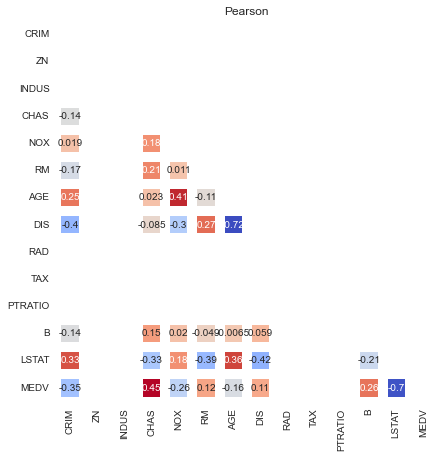

In [33]:
colors = 'coolwarm'
plt.figure(figsize = (10, 7)) 
matrix_pears_rad = np.triu(data_rad_tax.corr())
sns.heatmap(data_rad_tax.corr(), annot = True, cmap = colors,
            mask = matrix_pears_rad, linewidth = 10,
            square = True, cbar = False).set_title('Pearson');

Both mean and median MEDV for CHAS = 1 are higher than for CHAS = 0.

In [34]:
print('mean MEDV for CHAS = 1 :', data_rad_tax[data_rad_tax.CHAS == 1].MEDV.mean())
print('mean MEDV for CHAS = 0 :', data_rad_tax[data_rad_tax.CHAS == 0].MEDV.mean())

print('median MEDV for CHAS = 1 :', data_rad_tax[data_rad_tax.CHAS == 1].MEDV.median())
print('median MEDV for CHAS = 0 :', data_rad_tax[data_rad_tax.CHAS == 0].MEDV.median())

mean MEDV for CHAS = 1 : 31.3625
mean MEDV for CHAS = 0 : 15.438709677419354
median MEDV for CHAS = 1 : 22.299999999999997
median MEDV for CHAS = 0 : 14.1


Estimate regression models for the group using cross-validation on all data of the group.

In [35]:
print(len(data_rad_tax))

132


In [36]:
def linreg_cross_val_2 (X, y):
    
    cv = RepeatedKFold(n_splits = 4, n_repeats = 10, random_state = 42)
   
    scores_re = cross_val_score(LinearRegression(), X, y, scoring = 'r2',  cv = cv)

    return print('average R2: ', round(np.mean(scores_re), 4),
                ' median R2: ', round(np.median(scores_re), 4),
                ' sd R2: ', round(scores_re.std(), 4))

<u>Predictors with variation</u><br>
St.deviation of coef. of determination is quite high, coef. is 0.49-0.6.

In [37]:
X = data_rad_tax[['CRIM', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','B', 'LSTAT']]
y = data_rad_tax.MEDV
linreg_cross_val_2(X,y)

average R2:  0.4986  median R2:  0.605  sd R2:  0.2929


<u>Two mostly correlated predictors</u><br>
Coef. of determination decreases to 0.39-0.46.

In [38]:
X = data_rad_tax[['LSTAT','CHAS']]
y = data_rad_tax.MEDV
linreg_cross_val_2(X,y)

average R2:  0.3991  median R2:  0.4665  sd R2:  0.296


<u>Only LSTAT</u><br>
One-predictor model has the lowest sd and coef. 0.40-0.44.

In [39]:
X = data_rad_tax[['LSTAT']]
y = data_rad_tax.MEDV
linreg_cross_val_2(X,y)

average R2:  0.4076  median R2:  0.4424  sd R2:  0.2175


This group of data is quite poorly described by linear regression.

<a href="#0"><h4>Back to the top</h4></a>

<p id="3.3">
<h5>Group RAD <> 24 (correlation and regression)</h5>


Correlations with target are similar to correlations in the whole dataset. Correlation with RM increases to 0.89, LSTAT decreases to 0.67. Multicollinearity risk: NOX-CRIM, NOX-INDUS, AGE-NOX, DIS-ZN, NOX-DIS, DIS-AGE, LSTAT-RM.

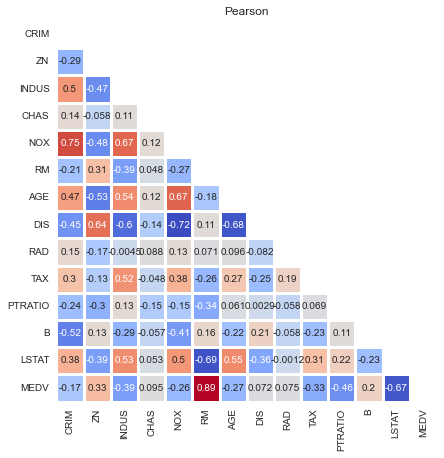

In [40]:
colors = 'coolwarm'
plt.figure(figsize = (7, 7)) 
matrix_1 = np.triu(data_rest.corr())
sns.heatmap(data_rest.corr(), annot = True, 
            cmap = colors, mask = matrix_1, linewidth = 3, 
            square = True, cbar = False).set_title('Pearson');

In [41]:
print(len(data_rest))

374


<u>All predictors</u><br>
Quite high coef. of determination 0.84, significantly higher than in the base model on the whole dataset.

In [42]:
X = data_rest[data_rest.columns[:-1]]
y = data_rest.MEDV
linreg_cross_val_2(X,y)

average R2:  0.843  median R2:  0.8538  sd R2:  0.0393


<u>Same predictors as in chosen model from the whole dataset: RM+LSTAT+PTRATIO</u><br>
Reducing predictors from 13 to 3 leads to decrease in coef. of determination only by 0.02. 

In [43]:
X = data_rest[['RM', 'LSTAT','PTRATIO']]
y = data_rest.MEDV
linreg_cross_val_2(X,y)

average R2:  0.8133  median R2:  0.8258  sd R2:  0.0508


This group of data is better described by linear model than the whole dataset. Quality of the models are significantly higher. Probably, it makes sense to figure out what the group with RAD=24 means and decide about its inclusion in regression analysis.

<a href="#0"><h4>Back to the top</h4></a>